# Exploration Exercises
### Our Zillow scenario continues:

[ds.codeup.com](url_here)

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1) As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

3) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6) Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7) Come up with some initial hypotheses based on your goal of predicting property value.

8) Visualize all combinations of variables in some way.

9) Run the appropriate statistical tests where needed.

10) What independent variables are correlated with the dependent variable, home value?

11) Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12) Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13) Explore your dataset with any other visualizations you think will be helpful.

(2134889, 8)
(2096851, 8)


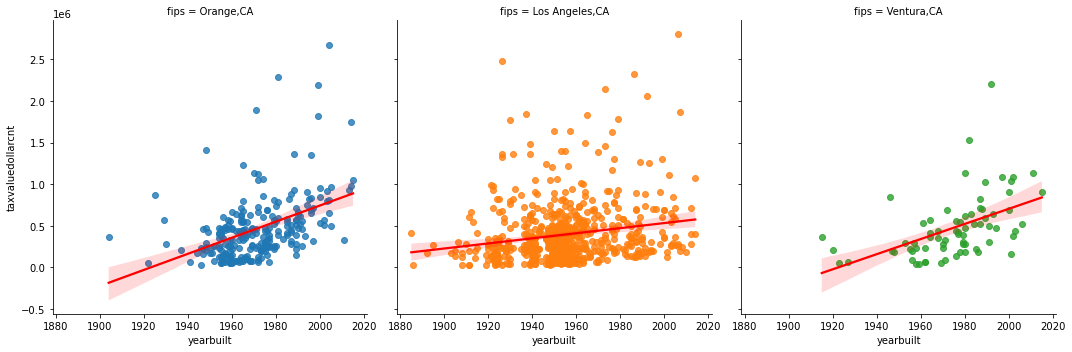

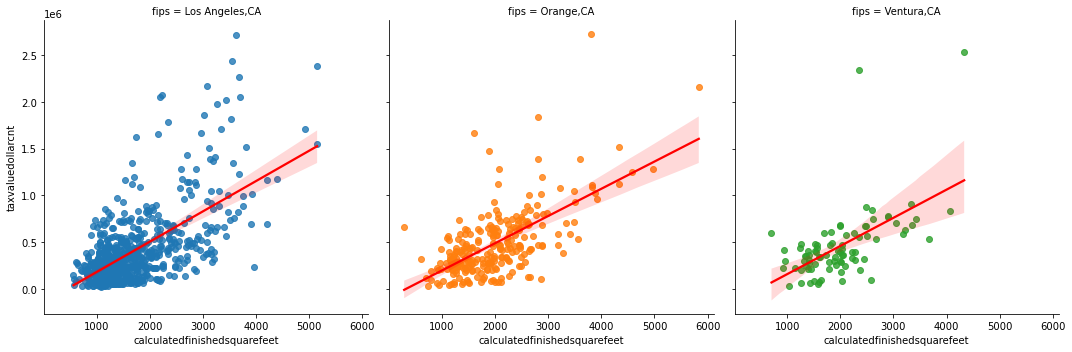

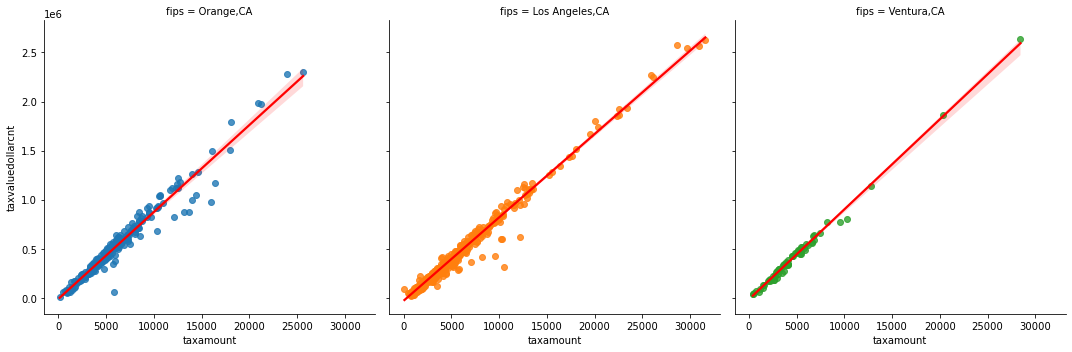

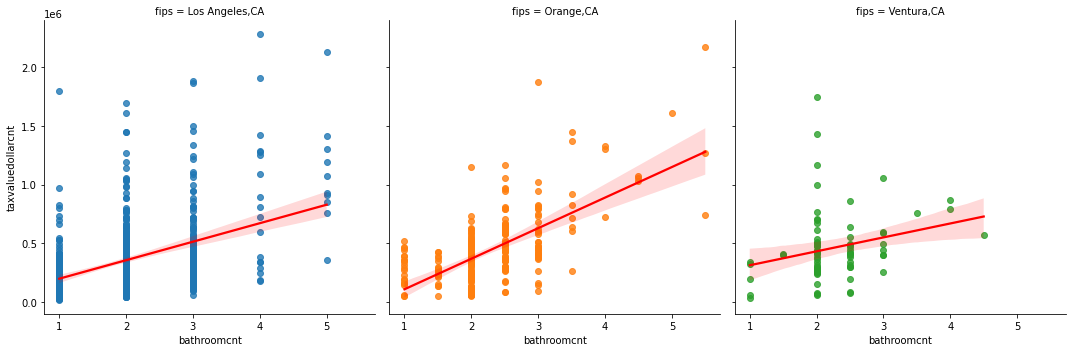

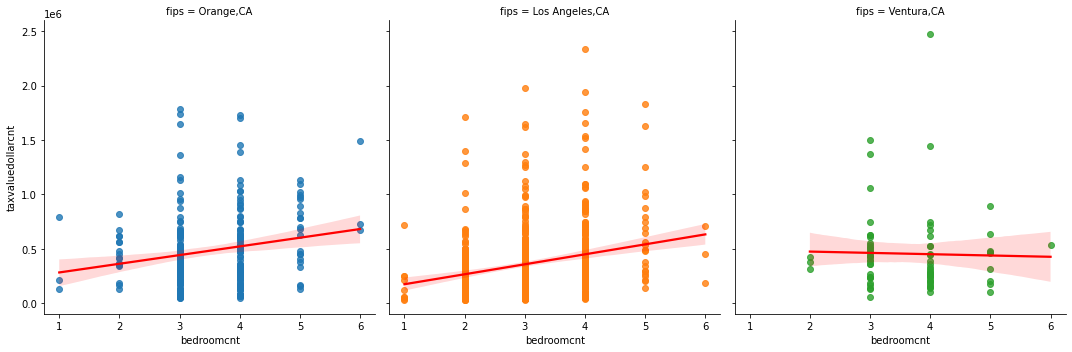

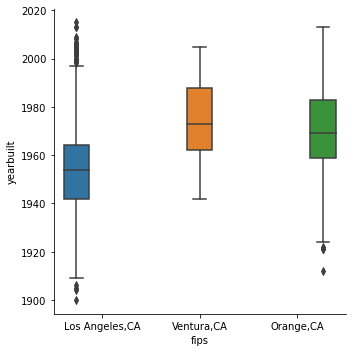

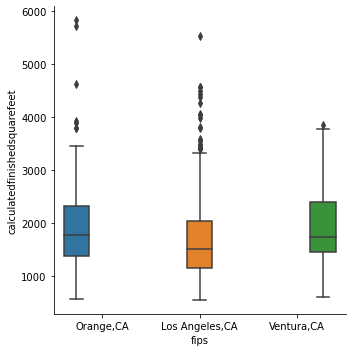

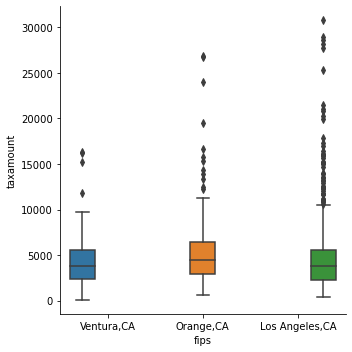

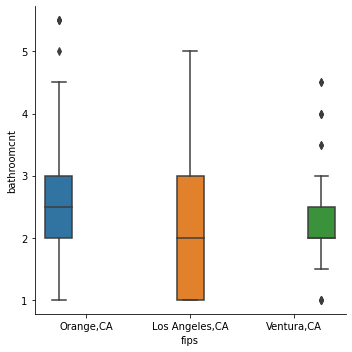

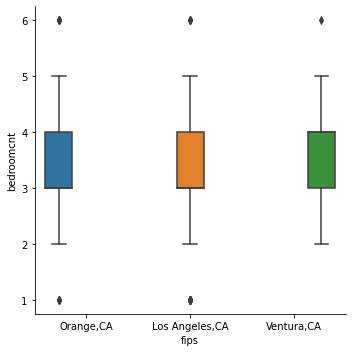

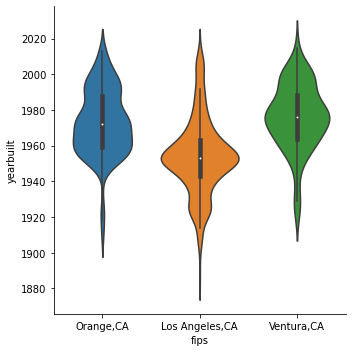

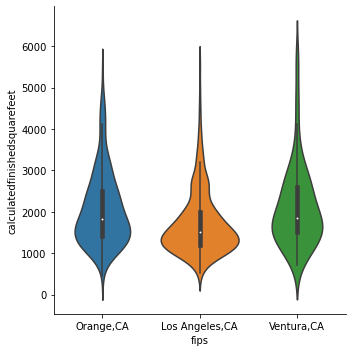

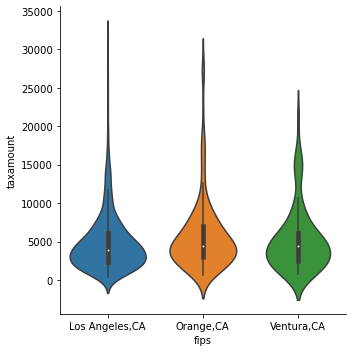

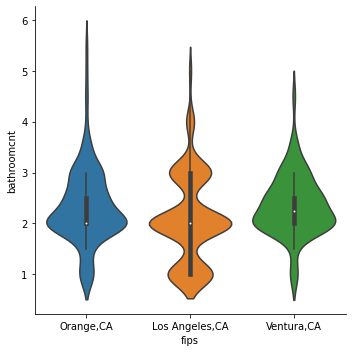

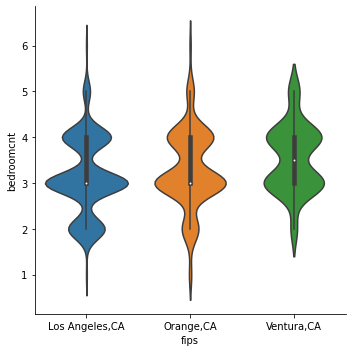

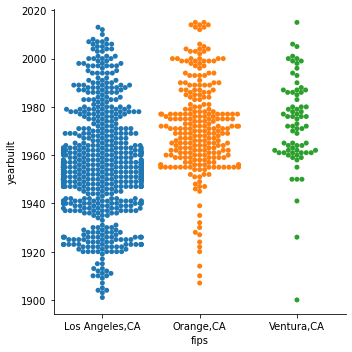

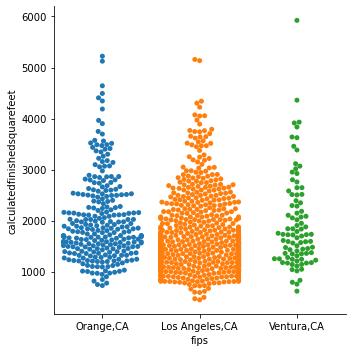

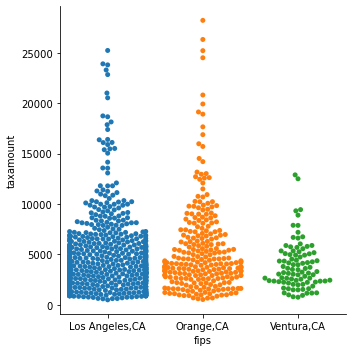

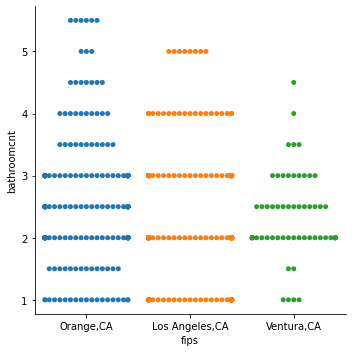

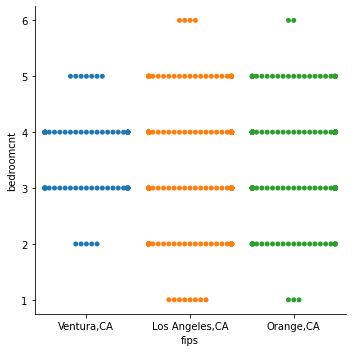

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
from scipy.stats import pearsonr, spearmanr
import scipy
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
train = wrangle.train

In [2]:
# we will be working with the train data set that we have prepared by splitting our original zillow data set.
train

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA"
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA"
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA"
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA"
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,"Los Angeles,CA"
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,"Los Angeles,CA"
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,"Los Angeles,CA"
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,"Los Angeles,CA"


In [3]:
# here we replace the fip values witth there corresponding counties
train['fips'] = train['fips'].replace(6037, 'Los Angeles,CA')
train['fips'] = train['fips'].replace(6059, 'Orange,CA')
train['fips'] = train['fips'].replace(6111, 'Ventura,CA')

 ### Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
# putting collumns into a name so that i can call on it later.
columns = ['yearbuilt','calculatedfinishedsquarefeet','taxamount','bathroomcnt','bedroomcnt']


<AxesSubplot:xlabel='bathroomcnt', ylabel='taxvaluedollarcnt'>

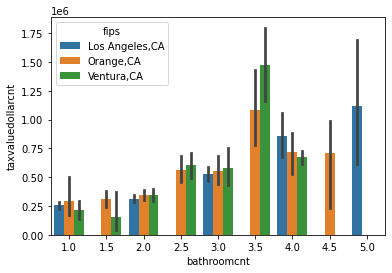

In [5]:
sns.barplot(x = 'bathroomcnt', y='taxvaluedollarcnt', hue = 'fips',data=train.sample(1000))

takeaways: Orange county and LA county have large amount of bathrooms as the tax value count increases

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

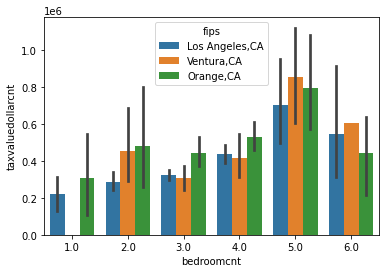

In [6]:
sns.barplot(x = 'bedroomcnt', y='taxvaluedollarcnt', hue = 'fips',data=train.sample(1000))

takeaways:  bedroom count for orange county is high based on its taxdollarvaluecnt

takeaways: Orangecounty and LA county have high taxvalluedollarcount amounts based on squarefeet and tax amount paid.

***

### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

***

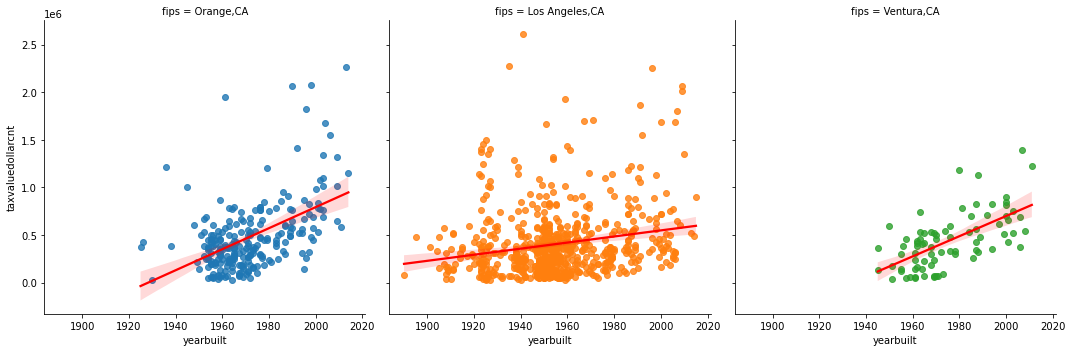

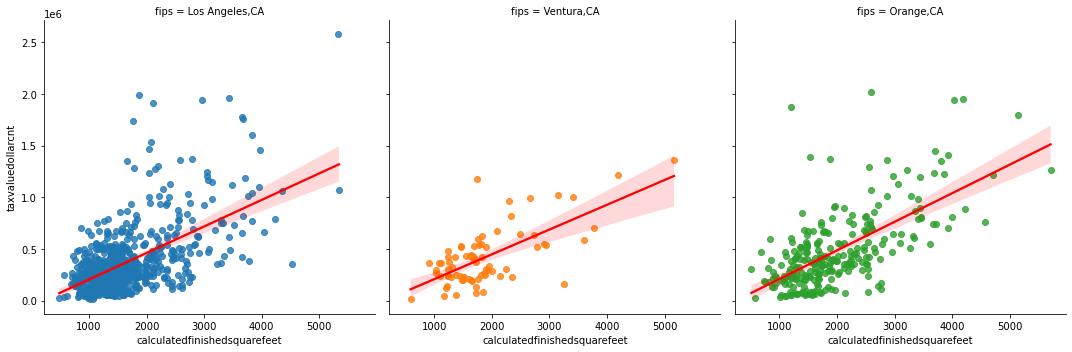

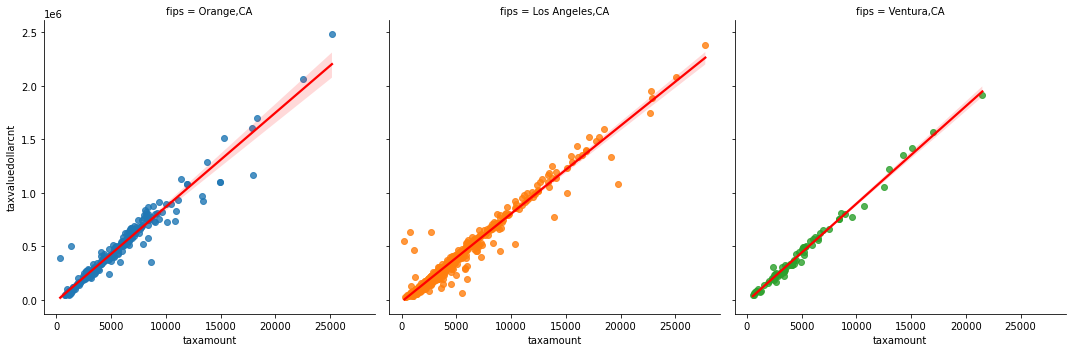

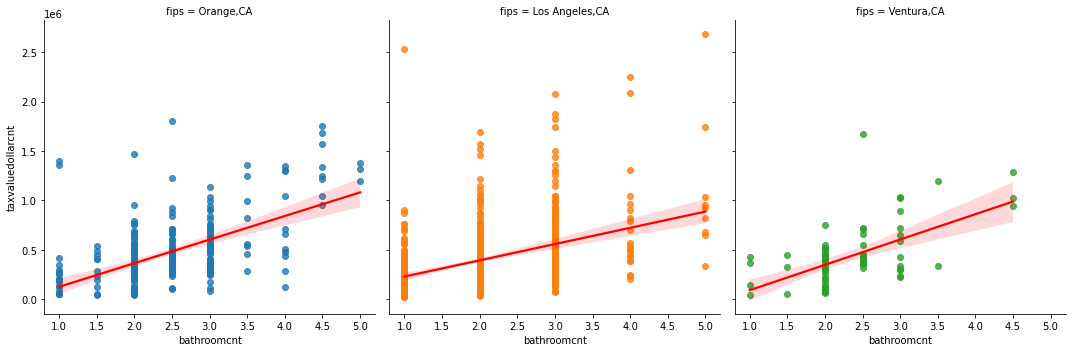

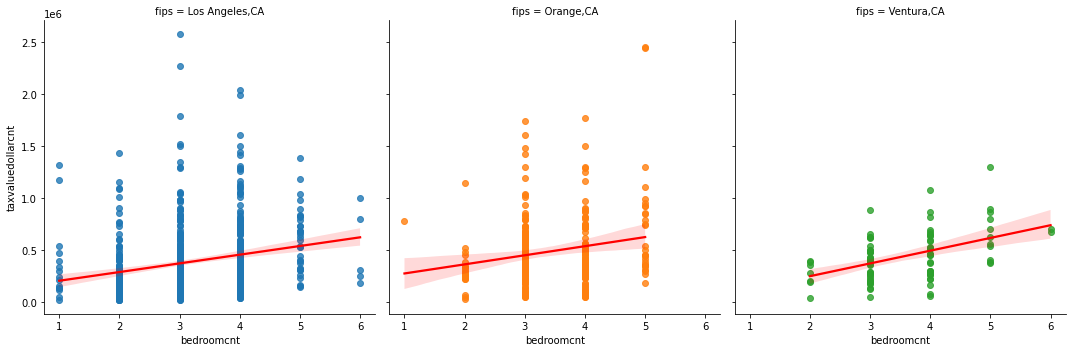

In [11]:
#continues data visuals 
# def plot_variable_pairs():
#     for col in columns:
#         sns.lmplot(x = col, y='taxvaluedollarcnt', col = 'fips',hue='fips',
#                line_kws= {'color': 'red'},data=train.sample(1000))
    
wrangle.plot_variable_pairs()

***

### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

***

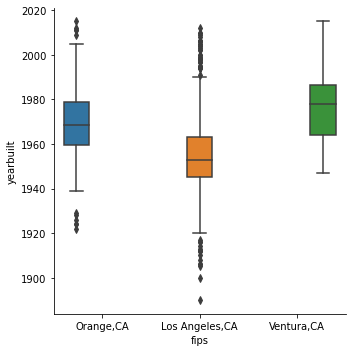

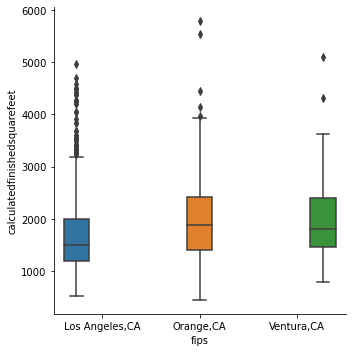

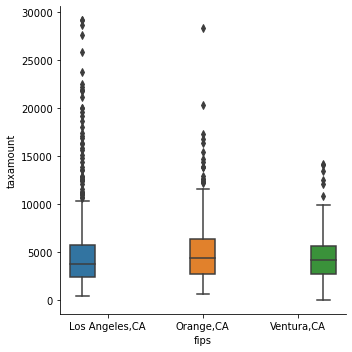

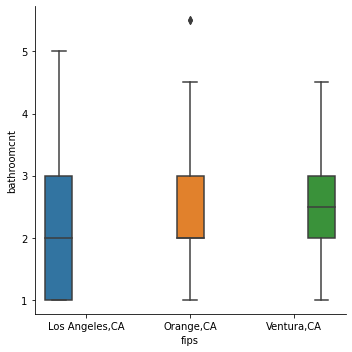

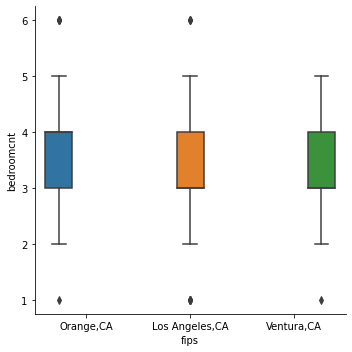

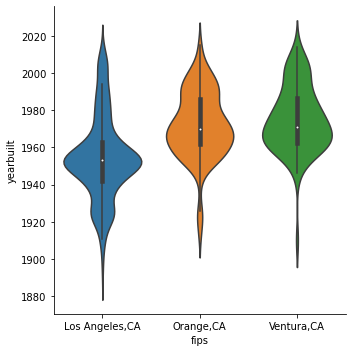

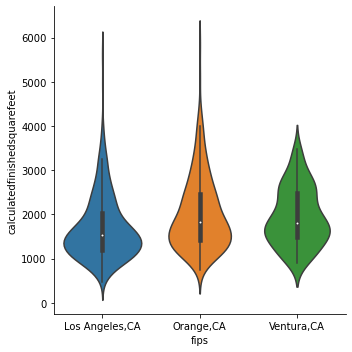

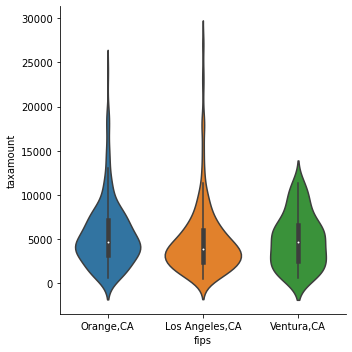

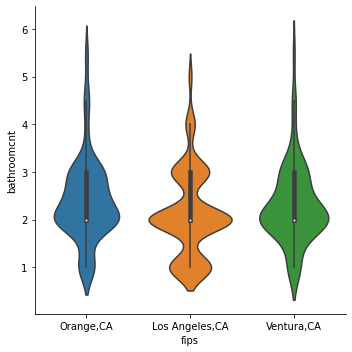

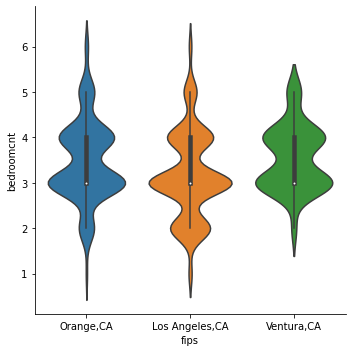

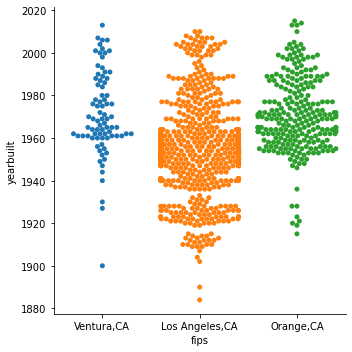

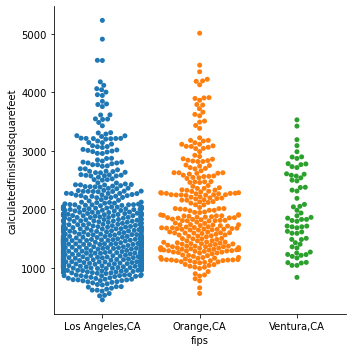

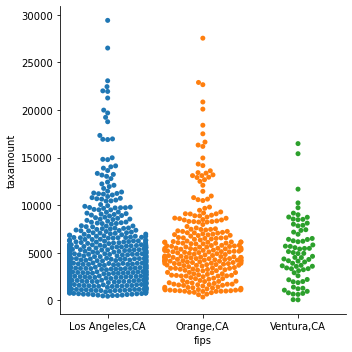

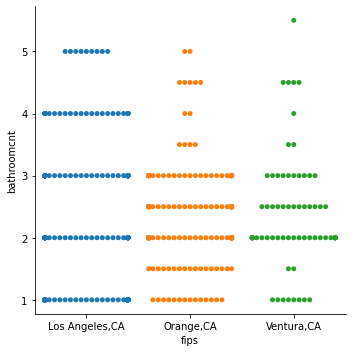

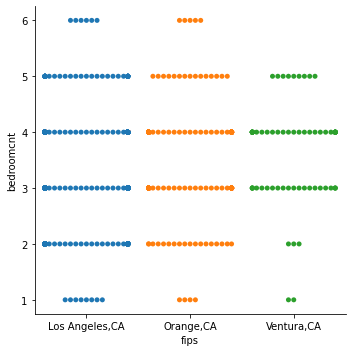

In [12]:
# columns = ['yearbuilt','calculatedfinishedsquarefeet','taxamount','bathroomcnt','bedroomcnt']
# def plot_categorical_and_continuous_vars():
#     for col in columns:
#         sns.catplot(x='fips', y=col, hue='fips',
#             kind="box", data=train.sample(1000))
#     for col in columns:
#         sns.catplot(x='fips', y= col,kind="violin", data=train.sample(1000)) 
#     for col in columns:
#         sns.catplot(x='fips', y= col,kind="swarm", data=train.sample(1000))
        
wrangle.plot_categorical_and_continuous_vars()

***

### Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

***

### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.


*** 

### Come up with some initial hypotheses based on your goal of predicting property value.


***

In [ ]:
8) Visualize all combinations of variables in some way.

9) Run the appropriate statistical tests where needed.

10) What independent variables are correlated with the dependent variable, home value?

11) Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12) Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13) Explore your dataset with any other visualizations you think will be helpful.